In [1]:
import pandas as pd
df = pd.read_csv('./data/EJI_2024_United_States.csv')

print(df.head())


   STATEFP  COUNTYFP  TRACTCE             AFFGEOID       GEOID  GEOID_2020  \
0        1         1    20804  140000US01001020804  1001020804  1001020804   
1        1         3    10706  140000US01003010706  1003010706  1003010706   
2        1         3    11503  140000US01003011503  1003011503  1003011503   
3        1         3    11604  140000US01003011604  1003011604  1003011604   
4        1         5   950100  140000US01005950100  1005950100  1005950100   

           COUNTY StateDesc STATEABBR  \
0  Autauga County   Alabama        AL   
1  Baldwin County   Alabama        AL   
2  Baldwin County   Alabama        AL   
3  Baldwin County   Alabama        AL   
4  Barbour County   Alabama        AL   

                                       LOCATION  ...  E_AIAN  NHPI  E_NHPI  \
0  Census Tract 208.04; Autauga County; Alabama  ...     0.0     0     0.0   
1  Census Tract 107.06; Baldwin County; Alabama  ...     0.0     0     0.0   
2  Census Tract 115.03; Baldwin County; Alabama  .

In [2]:
# environmental factors
# E_OZONE, EPL_OZONE, E_PM, EPL_PM, E_DSLPM, EPL_DSLPM, E_TOTCR, EPL_TOTCR, SPL_EBM_DOM1, RPL_EBM_DOM1

# location based environmental radius
# E_NPL, EPL_NPL, E_TRI, EPI_TRI, E_TSD, EPL_TSD, E_RMP, EPL_RMP, E_COAL, EPL_COAL, E_LEAD, EPL_LEAD, SPL_EBM_DOM2, RPL_EBM_DOM2

# E_ASTHMA =  percent of peopel with asmtha
# E_CHD = percent with coronary hd
# E_DIABETES = percent with individual with diabetes
env_subset = df.iloc[:,57:104]
asthma_label = df['E_CHD']
env_asthma = pd.concat([env_subset, asthma_label], axis=1)
env_asthma = env_asthma[~env_asthma.isin([-999]).any(axis=1)]
print(env_asthma)

       E_OZONE  EPL_OZONE  E_PM  EPL_PM  E_DSLPM  EPL_DSLPM  E_TOTCR  \
0          0.0        0.0   0.0     0.0   0.1394     0.2771       30   
1          0.0        0.0   0.0     0.0   0.1972     0.4430       30   
2          0.0        0.0   0.0     0.0   0.1520     0.3141       30   
3          0.0        0.0   0.0     0.0   0.0997     0.1546       20   
4          0.0        0.0   0.0     0.0   0.0655     0.0610       30   
...        ...        ...   ...     ...      ...        ...      ...   
85180      0.0        0.0   0.0     0.0   0.0899     0.1255       20   
85181      0.0        0.0   0.0     0.0   0.0948     0.1398       30   
85182      0.0        0.0   0.0     0.0   0.0950     0.1404       30   
85183      0.0        0.0   0.0     0.0   0.0960     0.1434       20   
85184      0.0        0.0   0.0     0.0   0.1711     0.3678       30   

       EPL_TOTCR  SPL_EBM_DOM1  RPL_EBM_DOM1  ...  SPL_EBM_DOM4  RPL_EBM_DOM4  \
0         0.4976        0.7747        0.2051  ...     

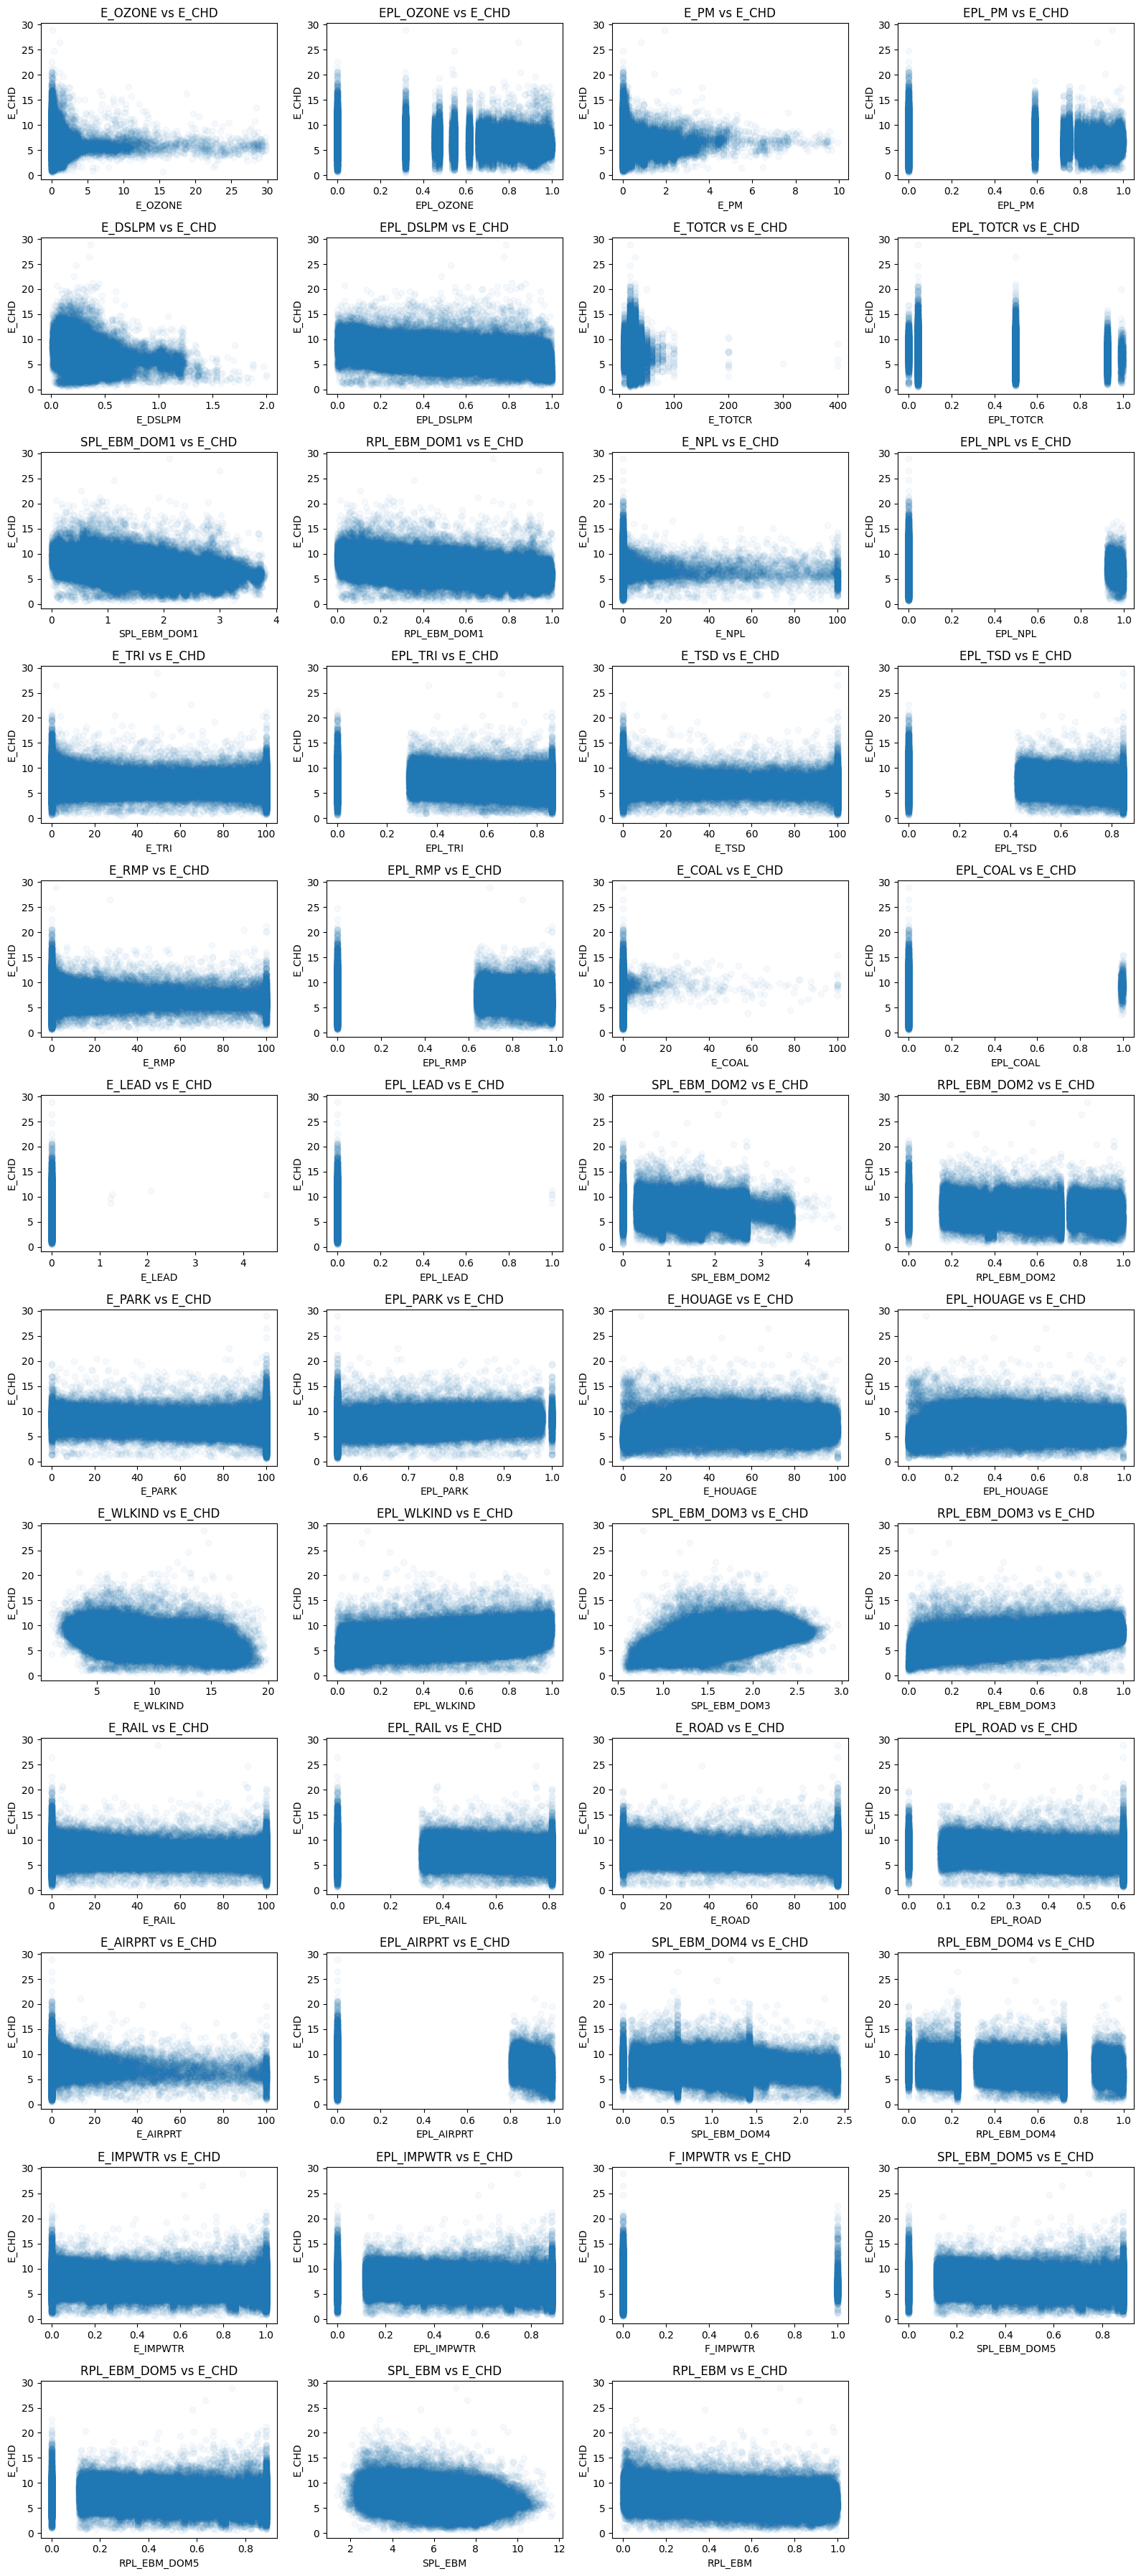

In [3]:
import matplotlib.pyplot as plt

# Get feature columns (all except the last one)
x_columns = env_asthma.columns[:-1]
# Get the last column (target/label)
y_column = env_asthma.columns[-1]
y = env_asthma[y_column]

# Number of plots
num_cols = len(x_columns)

# Define layout for subplots (you can customize this)
import math
n_cols = 4  # Number of subplots per row
n_rows = math.ceil(num_cols / n_cols)

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

# Plot each x column vs y
for i, col in enumerate(x_columns):
    axes[i].scatter(env_asthma[col], y, alpha=0.04)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(y_column)
    axes[i].set_title(f'{col} vs {y_column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tidy layout
fig.tight_layout()
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression

# Features (all columns except last)
X = env_asthma.iloc[:, :-1].values

# Target (last column)
y = env_asthma.iloc[:, -1].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Output parameters
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Optional: create a list with intercept and coefficients together
params = [intercept] + list(coefficients)
print("Parameters (intercept + coefficients):", params)


Intercept: 4.435025767902969
Coefficients: [ 1.91121813e-02 -1.20157242e-03 -5.72808300e-02  2.60481065e-01
 -5.74587477e-01 -1.15986399e-01  4.77231558e-03  5.68510746e-01
  7.11803839e-01 -4.04389365e+00 -1.08118508e-03 -2.21629003e-01
  3.36673217e-03 -2.50642481e-01 -3.17997932e-03 -3.32394889e-01
  2.60550854e-03  6.08066498e-02  4.13390108e-03  6.59865381e-01
  3.20213114e-01  7.14513853e-01  6.30519510e-01 -1.61295778e+00
  2.11272236e-02  7.43342444e+00  1.07721059e-01 -7.74511436e+00
 -1.69706097e-01 -5.89086853e-01 -9.00776773e-01  6.35792818e-01
  3.35796020e-03  8.84916840e-02  3.93422877e-03 -8.47483841e-01
 -4.41910623e-03  6.28731383e-01 -1.30260774e-01 -4.64802737e-01
  1.78350114e+00 -7.07211091e-01  4.59619060e-01 -7.07211091e-01
 -7.07211091e-01 -3.95925289e-01  1.87170573e+00]
Parameters (intercept + coefficients): [np.float64(4.435025767902969), np.float64(0.019112181282083338), np.float64(-0.0012015724155870593), np.float64(-0.05728082999374079), np.float64(0.2604

In [5]:
import pandas as pd

# Feature names (all except the last column)
feature_names = env_asthma.columns[:-1]

# Corresponding coefficients from the model
coefficients = model.coef_

# Create a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

print(coef_df)


         Feature  Coefficient
0       EPL_PARK     7.433424
1        RPL_EBM     1.871706
2       E_IMPWTR     1.783501
3       EPL_LEAD     0.714514
4   SPL_EBM_DOM1     0.711804
5       EPL_COAL     0.659865
6   RPL_EBM_DOM3     0.635793
7   SPL_EBM_DOM2     0.630520
8     EPL_AIRPRT     0.628731
9      EPL_TOTCR     0.568511
10      F_IMPWTR     0.459619
11        E_LEAD     0.320213
12        EPL_PM     0.260481
13      E_HOUAGE     0.107721
14      EPL_RAIL     0.088492
15       EPL_RMP     0.060807
16        E_PARK     0.021127
17       E_OZONE     0.019112
18       E_TOTCR     0.004772
19        E_COAL     0.004134
20        E_ROAD     0.003934
21         E_TRI     0.003367
22        E_RAIL     0.003358
23         E_RMP     0.002606
24         E_NPL    -0.001081
25     EPL_OZONE    -0.001202
26         E_TSD    -0.003180
27      E_AIRPRT    -0.004419
28          E_PM    -0.057281
29     EPL_DSLPM    -0.115986
30  SPL_EBM_DOM4    -0.130261
31      E_WLKIND    -0.169706
32       E

In [ ]:
# EPL_PARK = inverse rank of access to park in 1m
# RPL_EMB = percentile rank of environmental burden module
# E_IMPWTR = Percentile rank of the percentage of the tract that intersects an impaired/impacted watershed at the HUC12 level